In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [173]:
class Node(object):
    def __init__(self, y, x, theta=0, parent=None):
        self.parent = parent
        self.children = []
        self.theta = theta
        self.x = x
        self.y = y
        
    def __str__(self):
        return "({}, {})".format(self.x, self.y)
    
    @property
    def r(self):
        return sqrt(self.x**2+ self.y**2)
    
class RandomWalk(object):
    def __init__(self, *args, angle_range = 2*pi):
        self.root = Node(*args)
        self.angle_range = angle_range
        self.leafs = {self.root}
        
    def add_leaf(self, node, n):
        self.leafs.remove(node)
        for i in range(n):
            theta = (random_sample()-0.5)*self.angle_range + node.theta
            node.children.append(Node(node.y + sin(theta), node.x + cos(theta), theta, node))
        
        for child in node.children:
            self.leafs.add(child)
            
    def walk_to_root(self, node):
        current = node
        while current:
            yield current
            current = current.parent

In [174]:
root = Node(0,0)
current = root
for i in range(100):
    temp = Node(current.y + randn(), current.x + randn(), current)
    current.children.append(temp)
    current = temp

In [175]:
current = root
while current.children:
    current = current.children[0]

In [176]:
print(current)

(20.701046741328742, 5.109640980533566)


In [177]:
temp = []
while current:
    temp.append((current.y, current.x))
    current = current.parent

In [178]:
temp = array(temp)

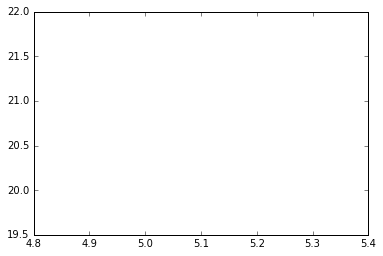

In [179]:
plot(temp[:,0], temp[:,1])

In [203]:
mytree = RandomWalk(0,0)
for leaf in mytree.leafs.copy():
    mytree.add_leaf(leaf,100)

mytree.angle_range=0
max_leaf = 0
i = 0
good_leafs = set()
while len(good_leafs) < 40 and mytree.leafs:
    for leaf in mytree.leafs.copy():
        mytree.add_leaf(leaf, 1 if randn() < 1 else 2)
    
    for leaf in mytree.leafs.copy():
        if leaf.r > 10:
            mytree.leafs.remove(leaf)
            good_leafs.add(leaf)
    i+=1
    mytree.angle_range=2*pi*(1-exp(-i/8))

(-10.797365194543538, 10.933477309318867, -10.0, 11.075680913398584)

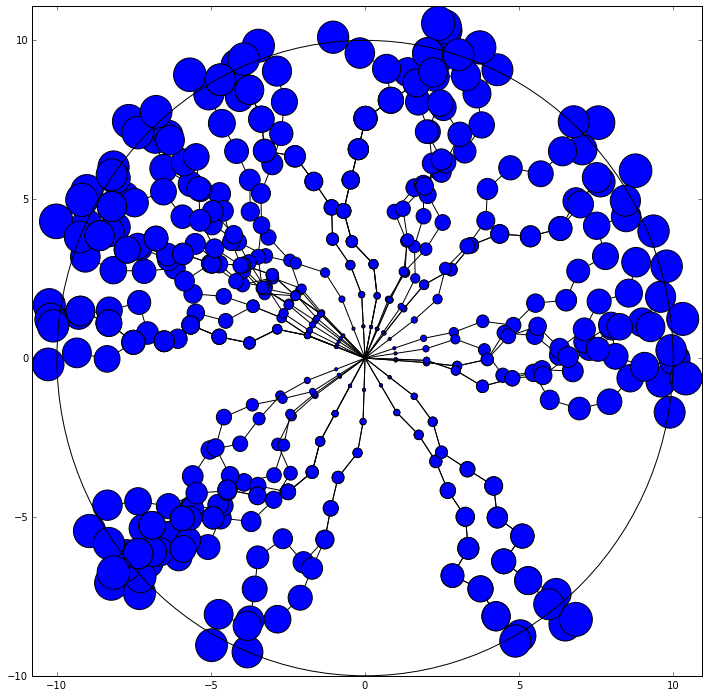

In [228]:
fig, ax = subplots(1,1, figsize=(12,12))
for leaf in good_leafs:
    temp = array([[node.x, node.y] for node in mytree.walk_to_root(leaf)])
    ax.plot(temp[:,0], temp[:,1], 'k', zorder=0)

for leaf in good_leafs:
    for node in mytree.walk_to_root(leaf):
        ax.add_patch(Circle((node.x,node.y), node.r/10/2, fc='b', zorder = 1))
    
# for leaf in good_leafs:
#     for node in mytree.walk_to_root(leaf):
#         if len(node.children) > 1:
#             ax.add_patch(Circle((node.x,node.y), 1/10, fc='r', zorder = 2))
c = Circle((0,0), 10, fill=False, zorder = 3)
ax.add_patch(c)
# recolor(ax, get_cmap('spring'))
# for l in ax.lines:
#     l.set_clip_path(c)
# for p in ax.patches:
#     p.set_clip_path(c)
ax.axis('tight')

(array([  2.,   4.,   7.,   9.,  15.,  17.,  19.,   9.,  11.,  13.]),
 array([ 0.76448228,  1.67027337,  2.57606446,  3.48185555,  4.38764664,
         5.29343773,  6.19922882,  7.10501991,  8.010811  ,  8.91660209,
         9.82239318]),
 <a list of 10 Patch objects>)

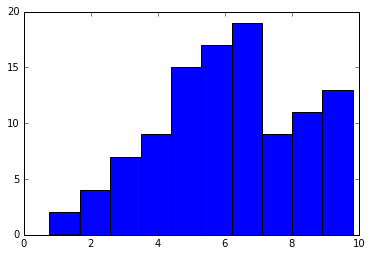

In [191]:
hist([sqrt(node.x**2 + node.y**2) for node in mytree.leafs])

(array([   4.,   34.,  160.,  305.,  213.,  112.,   89.,   73.,   25.,   16.]),
 array([ 18.11112066,  22.114193  ,  26.11726535,  30.1203377 ,
         34.12341004,  38.12648239,  42.12955474,  46.13262708,
         50.13569943,  54.13877178,  58.14184412]),
 <a list of 10 Patch objects>)

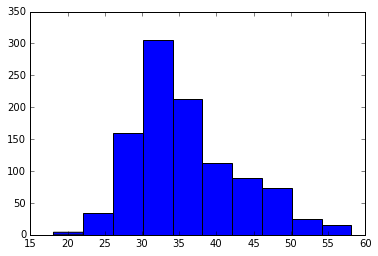

In [17]:
hist([node.x for node in mytree.leafs])

(array([   9.,   17.,   40.,   80.,   76.,  174.,  365.,  219.,   42.,    9.]),
 array([ 70.53314928,  72.77930717,  75.02546506,  77.27162294,
         79.51778083,  81.76393871,  84.0100966 ,  86.25625448,
         88.50241237,  90.74857026,  92.99472814]),
 <a list of 10 Patch objects>)

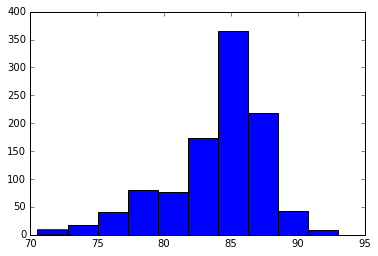

In [18]:
hist([node.y for node in mytree.leafs])

In [19]:
from itertools import accumulate
from functools import reduce

In [20]:
class RW_to_dist(object):
    def __init__(self, angle=2*pi):
        self.angle = angle
        self.x = [0]
        self.y = [0]
        self.theta = random_sample()*2*pi
        self.xtot = 0
        self.ytot = 0
        self.r = 0
        
    def step(self):
        dtheta = (random_sample()-0.5)*self.angle
        self.theta += dtheta
        theta = self.theta
        self.x.append(cos(theta))
        self.y.append(sin(theta))
        self.xtot += self.x[-1]
        self.ytot += self.y[-1]
        self.r = sqrt(self.xtot**2 + self.ytot**2)

In [21]:
junk = RW_to_dist()

In [22]:
while junk.r < 100:
    junk.step()

In [23]:
len(junk.x)

4376

In [24]:
from dphplotting import recolor

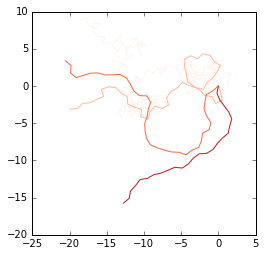

In [27]:
fig, ax = subplots(1,1, figsize=(4,4))
for i in range(1,5):
    junk = RW_to_dist(2*pi/i)
    while junk.r < 20:
        junk.step()
    ax.plot(list(accumulate(junk.x)), list(accumulate(junk.y)))
recolor(ax, cmap=get_cmap('Reds'))

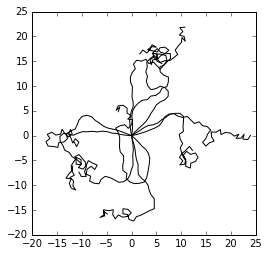

In [231]:
fig, ax = subplots(1,1, figsize=(4,4))
for i in range(0,10):
    junk = RW_to_dist(2*pi)
    for i in range(0,40):
        junk.angle = 2*pi*(i/40)
        junk.step()
    ax.plot(list(accumulate(junk.x)), list(accumulate(junk.y)), 'k')
# recolor(ax, cmap=get_cmap('spring'))

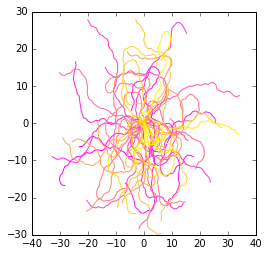

In [48]:
fig, ax = subplots(1,1, figsize=(4,4))
for i in range(1,50):
    junk = RW_to_dist(2*pi/4)
    theta = junk.theta
    for i in range(40):
        junk.step()
#         junk.theta = theta
    ax.plot(list(accumulate(junk.x)), list(accumulate(junk.y)))
recolor(ax, cmap=get_cmap('spring'))

In [237]:
junk_list = []
for i in range(0,5):
    junk = RW_to_dist(2*pi)
    for i in range(0,40):
        junk.angle = 2*pi*(i/40)
        junk.step()
    junk_list.append(junk)

junk_list2=[]
for junk in junk_list:
    for i in range(0,5):
        junk2 = RW_to_dist(2*pi)
        for i in range(0,40):
            junk2.angle = 2*pi*(i/40)
            junk2.step()
        junk_list2.append([junk.x + junk2.x, junk.y + junk2.y])
# recolor(ax, cmap=get_cmap('spring'))

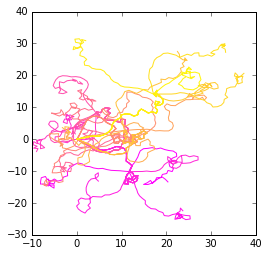

In [238]:
fig, ax = subplots(1,1, figsize=(4,4))
for junk in junk_list2:
    ax.plot(list(accumulate(junk[0])), list(accumulate(junk[1])), 'k')
    
recolor(ax, get_cmap('spring'))